# Lab 11
### DSCI 510 / USC / Hermjakob section / Spring 2025
---
Hello and welcome to Lab11.

Please complete the assignments individually. If you are having trouble completing the assignment, please contact your TA for help, but he will not write the code for you and no one else should :) !!!

Please complete the code in this notebook and submit it on Brightspace. Before you start with the lab assignment, please make sure that all supporting files are downloaded from Blackboard and are in the same directory as this notebook.

It's OK to use online resources such as https://docs.python.org/3 and https://stackoverflow.com regarding Python in general, but you must not look up the problems themselves.

Your last submission will be counted towards your grade.

Q1: DJIA Price History with Pandas [15 points]
---
Download the price history of the 30 stock companies in the Dow Jones Industrial Average (DJIA) index
for 2023 and 2024.

Create and display a pandas DataFrame as follows: 
* One row per company
* Columns: Company name, GICS Sector, Close 2022, Close 2023, Close 2024, Performance 2023, Performance 2024
* Sorted by performance in the two-year period 2023-2024, best performer first.

_Close 2022_ is the closing price on the last trading day of 2022 (December 30).<br>
_Performance 2023_ is the relative gain from _close 2022_ to _close 2023_: $\frac{close2023 - close2022}{close2022}$<br>
Use _DJIA_stocks.csv_ for a list of DJIA stocks and their Global Industry Classification Standard (GICS) sectors.  

In [90]:
import pandas as pd
import yfinance as yf
import sys

# Add your code here
price_history = []
df = pd.read_csv('DJIA_stocks.csv')
for index, row in df.iterrows():
    symbol = row['Symbol']
    name = row['Description']
    GICS = row['GICS Sector']    
    try:
        data_2023 = yf.download(tickers=symbol, start='2022-12-30', end='2023-12-30', interval='1d')
        data_2024 = yf.download(tickers=symbol, start='2023-12-30', end='2024-12-30', interval='1d')
        close_2022 = data_2023['Close'].iloc[0].item()
        close_2023 = data_2023['Close'].iloc[-1].item()
        close_2024 = data_2024['Close'].iloc[-1].item()
        performance_2023 = (close_2023 - close_2022) / close_2022
        performance_2024 = (close_2024 - close_2023) / close_2023

        price_history.append({
            'Symbol' : symbol,
            'Company Name': name,
            'GICS Sector': GICS,
            'Close 2022': close_2022,
            'Close 2023': close_2023,
            'close 2024': close_2024,
            'Performance 2023': performance_2023,
            'Performance 2024': performance_2024,
            'Performance Total': (close_2024 - close_2022) / close_2022
        })

    except:
        sys.stderr.write(f"Error with symbol {symbol}")

stocks = pd.DataFrame(price_history)
stocks_sorted = stocks.sort_values(by='Performance Total',ascending=False)
stocks_sorted


    


    



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Symbol,Company Name,GICS Sector,Close 2022,Close 2023,close 2024,Performance 2023,Performance 2024,Performance Total
29,NVDA,Nvidia Corp,Information Technology,14.602036,49.503410,136.997391,2.390172,1.767433,8.382075
28,AMZN,Amazon.com Inc,Consumer Discretionary,84.000000,151.940002,223.750000,0.808810,0.472621,1.663690
8,CRM,Salesforce.Com Inc,Information Technology,131.646698,261.267914,337.919067,0.984614,0.293381,1.566863
11,AXP,American Express,Financials,143.061508,184.078018,299.350067,0.286705,0.626213,1.092457
17,WMT,Walmart Stores Inc,Consumer Staples,45.875896,51.785378,91.408981,0.128815,0.765150,0.992527
14,AAPL,Apple Inc,Information Technology,128.436676,191.380951,255.309296,0.490080,0.334037,0.987822
20,JPM,JP Morgan Chase & Co,Financials,125.753349,164.267441,238.462036,0.306267,0.451670,0.896268
2,MSFT,Microsoft Corp,Information Technology,235.475677,372.501923,429.668457,0.581913,0.153466,0.824683
1,GS,Goldman Sachs Group Inc,Financials,323.356049,374.787628,573.337036,0.159056,0.529765,0.773083
22,IBM,International Business Machines Co,Information Technology,128.683548,156.799332,221.305618,0.218488,0.411394,0.719766


Q2: Visualization with Matplotlib [15 points + 5 bonus points]
---
Visualize the data from Q1 as follows:
1. Print the stock price curve for _Apple_ for the two-year period 2023-2024.
2. Print a pie chart with the Global Industry Classification Standard (GICS) sectors of the 30 DJIA stocks, including percentages without decimals.
3. Print a scatter plot of the 30 DJIA stocks, with their 2023 performance on the x-axis and their 2024 performance on the y-axis.<br>5 bonus points if you color the scatter-plot dots for each stock to match the GICS sectors' colors in the pie chart.

[*********************100%***********************]  1 of 1 completed


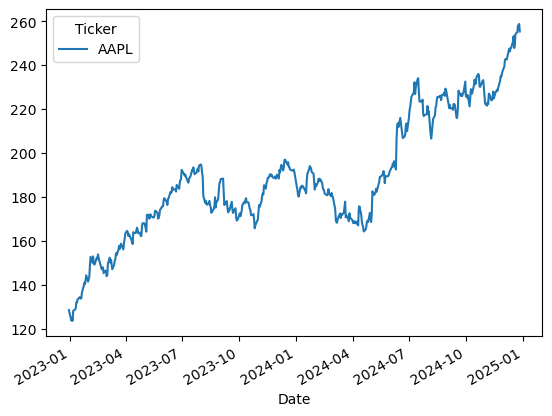

In [62]:
# Add your code for Q2.1 here
import pandas as pd
import matplotlib.pyplot as plt

apple = yf.download(tickers='AAPL',start='2022-12-30',end='2024-12-30')
apple['Close'].plot()
plt.show()

<Axes: ylabel='count'>

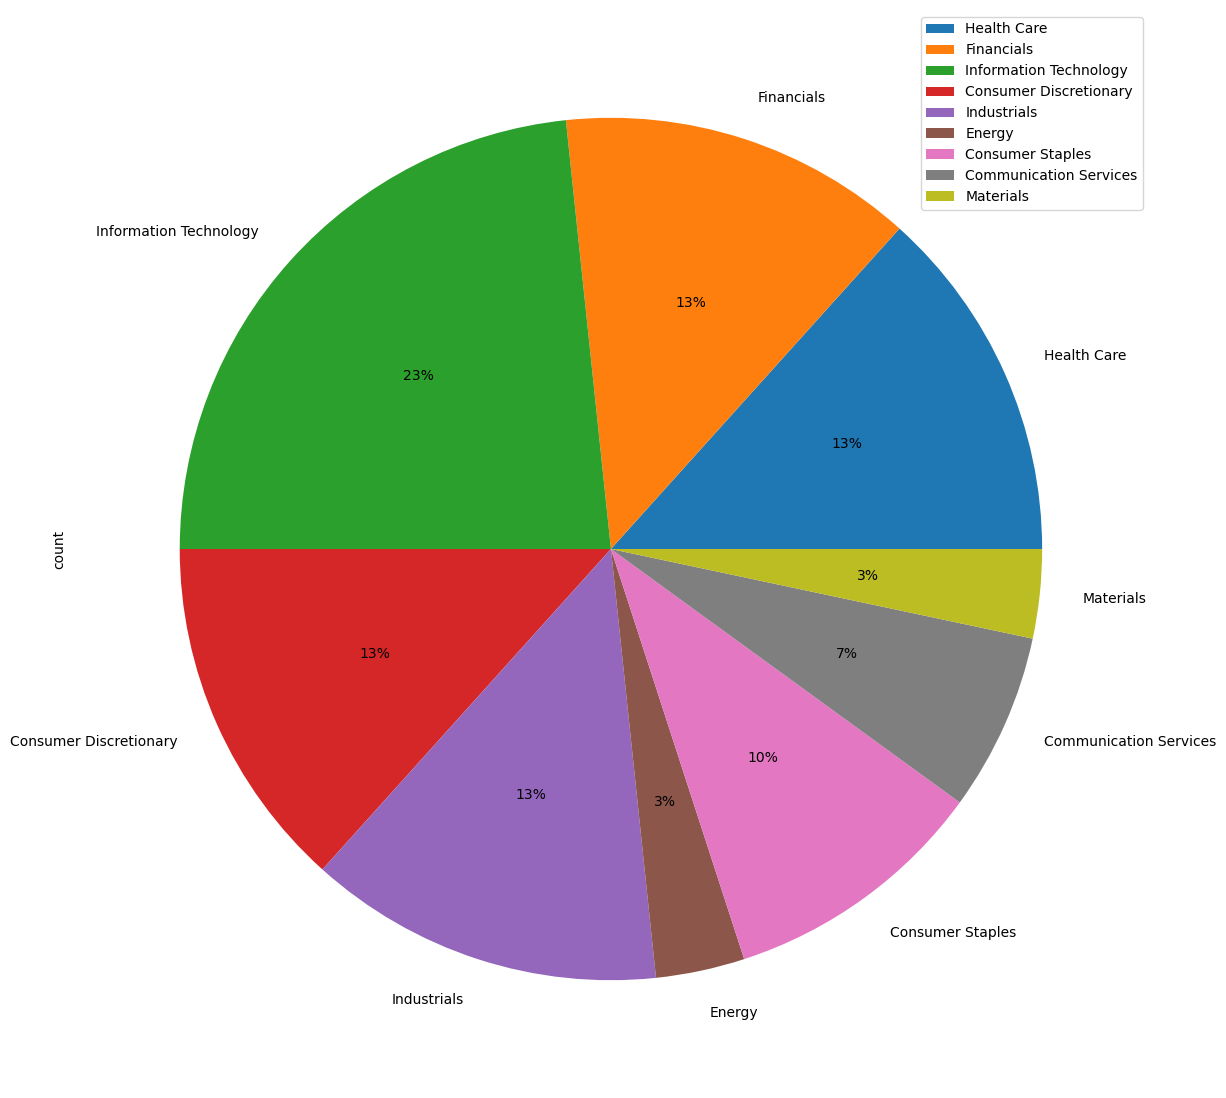

In [133]:
# Add your code for Q2.2 here
GICS_dict = dict()
for index,row in stocks.iterrows():
    company = row['Symbol']
    industry = row['GICS Sector']
    GICS_dict[industry] = GICS_dict.get(industry, 0) + 1

industries = GICS_dict.keys()
industry_count = GICS_dict.values()
pie_dict = {'industry': industries,'count':industry_count}
pie_df = pd.DataFrame(pie_dict)
plot = pie_df.plot.pie(y='count', labels=pie_df['industry'], autopct='%1.0f%%',figsize=(111,14))
plot
    

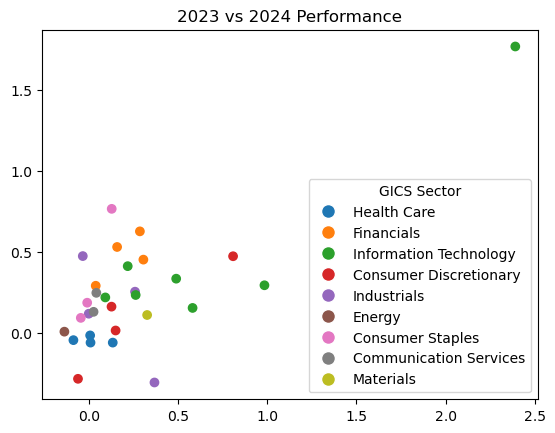

In [130]:
# Add your code for Q2.3 here
import pandas 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#create lists from the GICS Sectors and their correponding colors created in the pie chart 
legend = plot.get_legend()
labels = [text.get_text() for text in legend.get_texts()]
wedges = plot.patches
colors = [wedge.get_facecolor() for wedge in wedges]

#Create a colors dictionary from the GICS Sector and the colors associated 
colors_dict = dict(zip(labels,colors))
plot_colors = [colors_dict[category] for category in stocks['GICS Sector']]

#Create Custom Legend
custom_legend= []
for sector,color in colors_dict.items():
    item = Line2D([0],[0], marker='o',color='w',label=sector, markerfacecolor=color, markersize=10)
    custom_legend.append(item)

plt.scatter(stocks['Performance 2023'],stocks['Performance 2024'], color = plot_colors)
plt.title("2023 vs 2024 Performance")
plt.legend(handles=custom_legend, title='GICS Sector')
